### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [5]:
#Cambias el formato global para una mejor visualizacion ya tenemos pd importado antes
pd.options.display.float_format = '{:,.2f}'.format

#calculamos el ingreso por tienda
ingreso_tienda1=tienda['Precio'].sum()
ingreso_tienda2=tienda2['Precio'].sum()
ingreso_tienda3=tienda3['Precio'].sum()
ingreso_tienda4=tienda4['Precio'].sum()

#Agrupamos los ingresos
ingresos_tiendas = [('Facturacion Tienda 1', ingreso_tienda1),
           ('Facturacion Tienda 2', ingreso_tienda2),
           ('Facturacion Tienda 3', ingreso_tienda3),
           ('Facturacion Tienda 4', ingreso_tienda4)]

df_ingresos = pd.DataFrame(ingresos_tiendas, columns=['Tiendas', 'Ingreso'])

df_ingresos.head()


,Tiendas,Ingreso
0,Facturacion Tienda 1,"1,150,880,400.00"
1,Facturacion Tienda 2,"1,116,343,500.00"
2,Facturacion Tienda 3,"1,098,019,600.00"
3,Facturacion Tienda 4,"1,038,375,700.00"


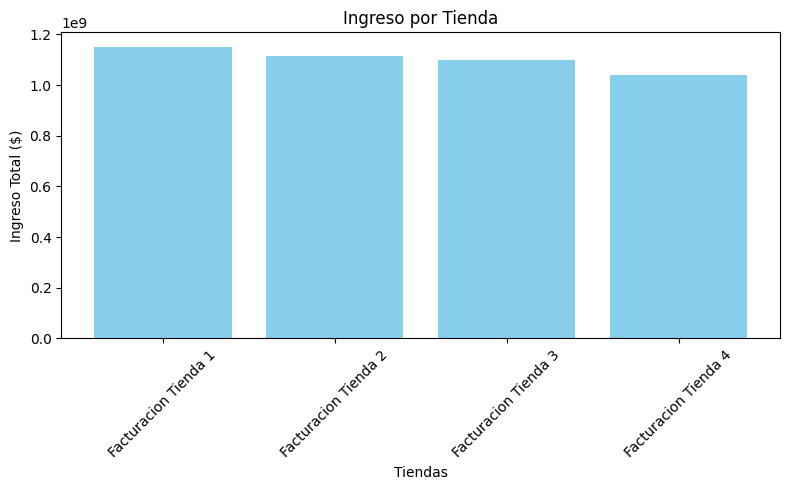

In [6]:
import matplotlib.pyplot as plt

# Ordenamos por ingreso de mayor a menor para que la gráfica sea más clara
df_ingresos = df_ingresos.sort_values(by='Ingreso', ascending=False)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.bar(df_ingresos['Tiendas'], df_ingresos['Ingreso'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total ($)')
plt.title('Ingreso por Tienda')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar
plt.show()

**Se observa que la tienda con mas ingresos es la tienda 1 y la tienda con menos ingresos es la tienda 4**

# 2. Ventas por categoría

In [19]:
pd.options.display.float_format = '{:,.2f}'.format
lista_tiendas=[('Tienda 1',tienda),('Tienda 2',tienda2),('Tienda 3',tienda3),('Tienda 4',tienda4)]

ventas_totales = []

for nombre, df_tienda in lista_tiendas:
    print(f"\n {nombre} - Número de ventas por categoría:\n")

      # Agrupamos por categoría y calculamos
    ventas_por_categoria = df_tienda.groupby('Categoría del Producto').agg(
        Numero_de_ventas=('Producto', 'count'),
        Total_vendido=('Precio', 'sum')
    ).reset_index()

    # Mostrar la tabla

    print(ventas_por_categoria)

    total_ventas = ventas_por_categoria['Total_vendido'].sum()
    total_vendido = ventas_por_categoria['Numero_de_ventas'].sum()
    print(f"\n Total Vendido en {nombre}: ${total_ventas:,.2f}")
    print(f"\n Total de Ventas en {nombre}: {total_vendido:,.0f}")



 Tienda 1 - Número de ventas por categoría:

    Categoría del Producto  Numero_de_ventas  Total_vendido
0  Artículos para el hogar               171  12,698,400.00
1     Deportes y diversión               284  39,290,000.00
2        Electrodomésticos               312 363,685,200.00
3             Electrónicos               448 429,493,500.00
4   Instrumentos musicales               182  91,299,000.00
5                 Juguetes               324  17,995,700.00
6                   Libros               173   8,784,900.00
7                  Muebles               465 187,633,700.00

 Total Vendido en Tienda 1: $1,150,880,400.00

 Total de Ventas en Tienda 1: 2,359

 Tienda 2 - Número de ventas por categoría:

    Categoría del Producto  Numero_de_ventas  Total_vendido
0  Artículos para el hogar               181  14,746,900.00
1     Deportes y diversión               275  34,744,500.00
2        Electrodomésticos               305 348,567,800.00
3             Electrónicos               422

Todas las tiendas tienen un volumen de venta total similar, aunque un pooco menor para la tienda 4

# 3. Calificación promedio de la tienda


In [23]:
def calcular_calificacion(lista_tiendas):
  calificaciones_lista=[]
  for i in lista_tiendas:
    calif_por_tienda= i[1]['Calificación'].mean().round(2)
    nombre= f"{i[0]}"
    calificaciones_lista.append({'Tienda': nombre, 'Calificación Promedio': calif_por_tienda})
  return calificaciones_lista
calificaciones_lista = calcular_calificacion(lista_tiendas)
df_calificaciones = pd.DataFrame(calificaciones_lista)

# Ordenar por calificación
df_calificaciones = df_calificaciones.sort_values(by='Calificación Promedio', ascending=False).reset_index(drop=True)

# Mostrar tabla
print(df_calificaciones)

     Tienda  Calificación Promedio
0  Tienda 3                   4.05
1  Tienda 2                   4.04
2  Tienda 4                   4.00
3  Tienda 1                   3.98


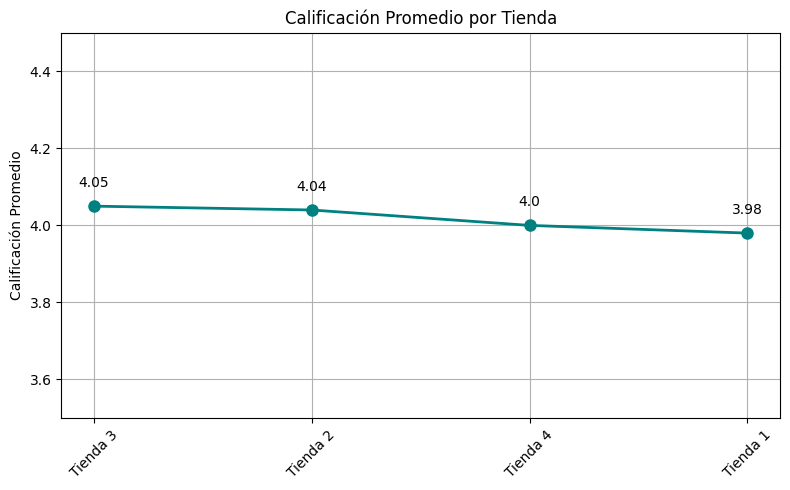

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], 'o-', color='teal', linewidth=2, markersize=8)

plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(3.5, 4.5)
plt.xticks(rotation=45)
plt.grid(True)

for i, v in enumerate(df_calificaciones['Calificación Promedio']):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center')

plt.tight_layout()
plt.show()



Vemos que la tienda 3 tiene una calificacion ligeramente mayor y la tienda 1 una calificaicion menor, sin embargo la que le precede en peor calificacion es la tienda 4

# 4. Productos más y menos vendidos

In [32]:
import pandas as pd

def calcular_productos_vendidos_y_total(lista_tiendas):
    for nombre, df_tienda in lista_tiendas:
        print(f"\n {nombre} - Productos más y menos vendidos y su total de ventas:\n")

        # Agrupar por producto y calcular el número de ventas y el total de ventas
        productos_vendidos = df_tienda.groupby('Producto').agg(
            Numero_de_ventas=('Producto', 'count'),
            Total_de_ventas=('Precio', 'sum')
        ).reset_index()

        # Ordenar de mayor a menor ventas
        productos_vendidos = productos_vendidos.sort_values(by='Numero_de_ventas', ascending=False)

        # Mostrar productos más vendidos
        print(f"\n Productos más vendidos en {nombre}:")
        print(productos_vendidos[['Producto', 'Numero_de_ventas', 'Total_de_ventas']].head())  # 5 productos más vendidos

        # Mostrar productos menos vendidos
        print(f"\n Productos menos vendidos en {nombre}:")
        print(productos_vendidos[['Producto', 'Numero_de_ventas', 'Total_de_ventas']].tail())  # 5 productos menos vendidos

        print("\n" + "-"*50)

# Ejecutar la función para todas las tiendas
calcular_productos_vendidos_y_total(lista_tiendas)



 Tienda 1 - Productos más y menos vendidos y su total de ventas:


 Productos más vendidos en Tienda 1:
            Producto  Numero_de_ventas  Total_de_ventas
1            Armario                60    29,462,300.00
48     TV LED UHD 4K                60   142,150,200.00
33        Microondas                60    34,761,500.00
40  Secadora de ropa                58    59,062,400.00
32     Mesa de noche                56    15,679,600.00

 Productos menos vendidos en Tienda 1:
                     Producto  Numero_de_ventas  Total_de_ventas
34                    Mochila                39     3,867,200.00
38                  Pandereta                36     2,238,900.00
37            Olla de presión                35     2,629,300.00
13               Celular ABXY                33    32,651,000.00
4   Auriculares con micrófono                33     4,730,800.00

--------------------------------------------------

 Tienda 2 - Productos más y menos vendidos y su total de ventas:


 Producto

# 5. Envío promedio por tienda

In [48]:
import pandas as pd
# Lista para almacenar los resultados
resultados = []

# Calcular el costo de envío promedio para cada tienda
for nombre, df_tienda in lista_tiendas:
    costo_envio_promedio = df_tienda['Costo de envío'].mean().round(2)
    resultados.append({'Tienda': nombre, 'Costo de Envío Promedio ($)': costo_envio_promedio})

df_resultados = pd.DataFrame(resultados)

# Mostrar la tabla
print("\n Costo de Envío Promedio por Tienda:\n")
print(df_resultados)



 Costo de Envío Promedio por Tienda:

     Tienda  Costo de Envío Promedio ($)
0  Tienda 1                    26,018.61
1  Tienda 2                    25,216.24
2  Tienda 3                    24,805.68
3  Tienda 4                    23,459.46


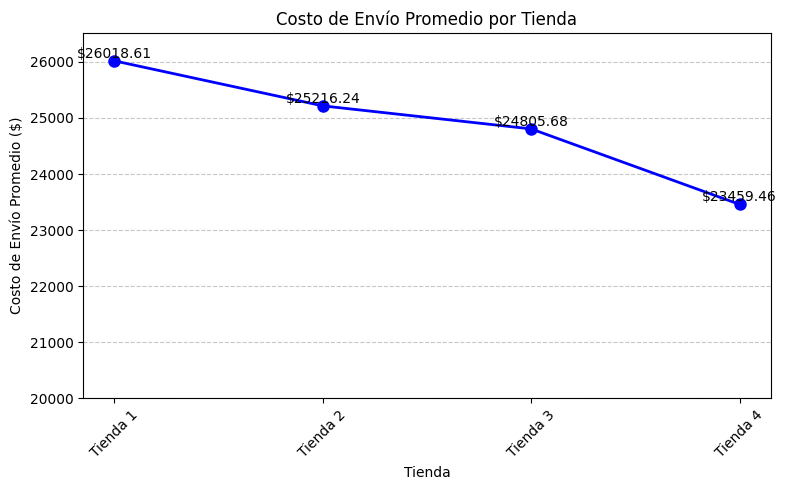

In [55]:
import matplotlib.pyplot as plt
df_resultados = pd.DataFrame(resultados)

plt.figure(figsize=(8, 5))
plt.plot(df_resultados['Tienda'], df_resultados['Costo de Envío Promedio ($)'],
         marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio ($)')
plt.ylim(20000, df_resultados['Costo de Envío Promedio ($)'].max() + 500)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de los puntos
for i, v in enumerate(df_resultados['Costo de Envío Promedio ($)']):
    plt.text(i, v + 0.5, f'${v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Se Observa que la tienda con mayor costo de envio promedio es la Tienda 1

A pesar de la que la tienda 1 es la que tiene mas costos de envio, y la peor calificacion, es la tienda que mas ingresos genera, y la que sus productos mas vendidos generan mas ingresos que las demas tiendas.

La tienda 4 es la que menos ingresos genera, y la penultima con peor calificacion promedio, y su productos mas vendidos generan menos ingresos que las otras tiendas, por lo que debería considerarse su venta.